# Module import

In [1]:
## Import module 
import Func_1  #Custom Functions 
import os
import re
import cv2
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [1]:
%pwd

'C:\\Users\\icecr\\OneDrive\\GitHub\\Repositories\\ImgClassification_VGGnet'

# Resize & Align by 1..2..3..

In [2]:
## Create directory
!mkdir d:\\sample
!mkdir d:\\sample\\raw
!mkdir d:\\sample\\resize

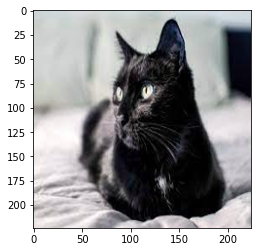

img shape (224, 224, 3)


In [4]:
## Resize & create file by order:asc
path_etc = 'd:\\sample\\raw'
path_re = 'd:\\sample\\resize'

Func_1.resize(path_etc, path_re, height=224, width=224)  #filename must me English  #default = 128*128

# Create Label (csv file)

In [5]:
## Make csv file in path_re
path_re = 'd:\\sample\\label.csv'
Func_1.csv_maker_5(path_re, k1=100, k2=100, k3=100, k4=100, k5=100)

# Generating

## Create Generated imgs

In [6]:
## Create directory
!mkdir d:\\sample\\datagen
!mkdir d:\\sample\\fixed_resize

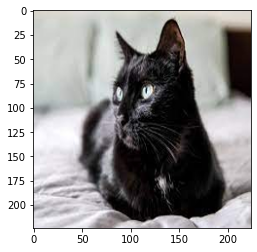

img shape (224, 224, 3)


In [7]:
## Resize & create file by order:asc
path_etc = 'd:\\sample\\raw'
path_re = 'd:\\sample\\fixed_resize'

Func_1.fix_resize(path_etc, path_re, height=224, width=224)  #filename must me English  #default = 128*128

In [9]:
## Load IMGs
path = 'd:\\sample\\fixed_resize'
resize = Func_1.image_load(path)

(500, 224, 224, 3)


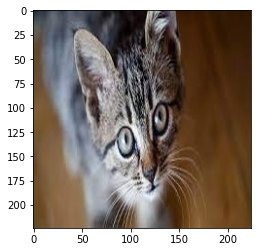

In [10]:
## Check out first img(resized)
import matplotlib.pyplot as plt

img = resize[0, : ]
plt.figure()
plt.imshow(img)

print(resize.shape)

In [11]:
## Make X (feature)
X = resize
X.shape

(500, 224, 224, 3)

In [12]:
## Sampling
X = X.astype('float')
X = X/255
X.shape 

(500, 224, 224, 3)

In [19]:
## Func : datagen
def datagen(p1, p2, data, path):
    #p1 : picture range generating
    #p2 : generating figures per each picture
    X = data
    for k in range(p1):
        X2 = X[k:k+1, : ]
        X2.reshape(1, -1)

        i = 1
        for batch in X_datagen.flow(X2, batch_size=1,
                                    save_to_dir=path, 
                                    save_prefix='Picture'+str(k), 
                                    save_format='jpg'):
            i += 1
            if i > p2:
                break  

In [20]:
## Setting options
# Index : url below                
# https://m.blog.naver.com/PostView.nhn?blogId=isu112600&logNo=221582003889&proxyReferer=https:%2F%2Fwww.google.com%2F

from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_datagen = ImageDataGenerator(horizontal_flip = True,
                               vertical_flip = False,
                               #brightness_range = [0.2, 1.0],
                               #width_shift_range = 0.2,
                               #height_shift_range = 0.2,
                               zoom_range = 0.1,
                               rotation_range = 50,
                               fill_mode = 'nearest'
                              )

In [21]:
## Execute function : datagen
path = 'd:\\sample\\datagen'
datagen(5,10,X,path)  #Create datagen imgs (50 figs:5*10)

## Visualize generated img on jupyter

In [22]:
## file name change 

%cd d:/sample/datagen
import os
count = 1
for i in os.listdir():
    os.rename(i, str(count) + '.' + i.split('.')[-1] )
    count += 1

d:\sample\datagen


In [24]:
## Load IMGs
path_re = 'd:\\sample\\datagen'
sample = Func_1.image_load(path_re)

In [25]:
## sampling
sample = sample.astype('float')
sample = sample/255
sample.shape

(50, 224, 224, 3)

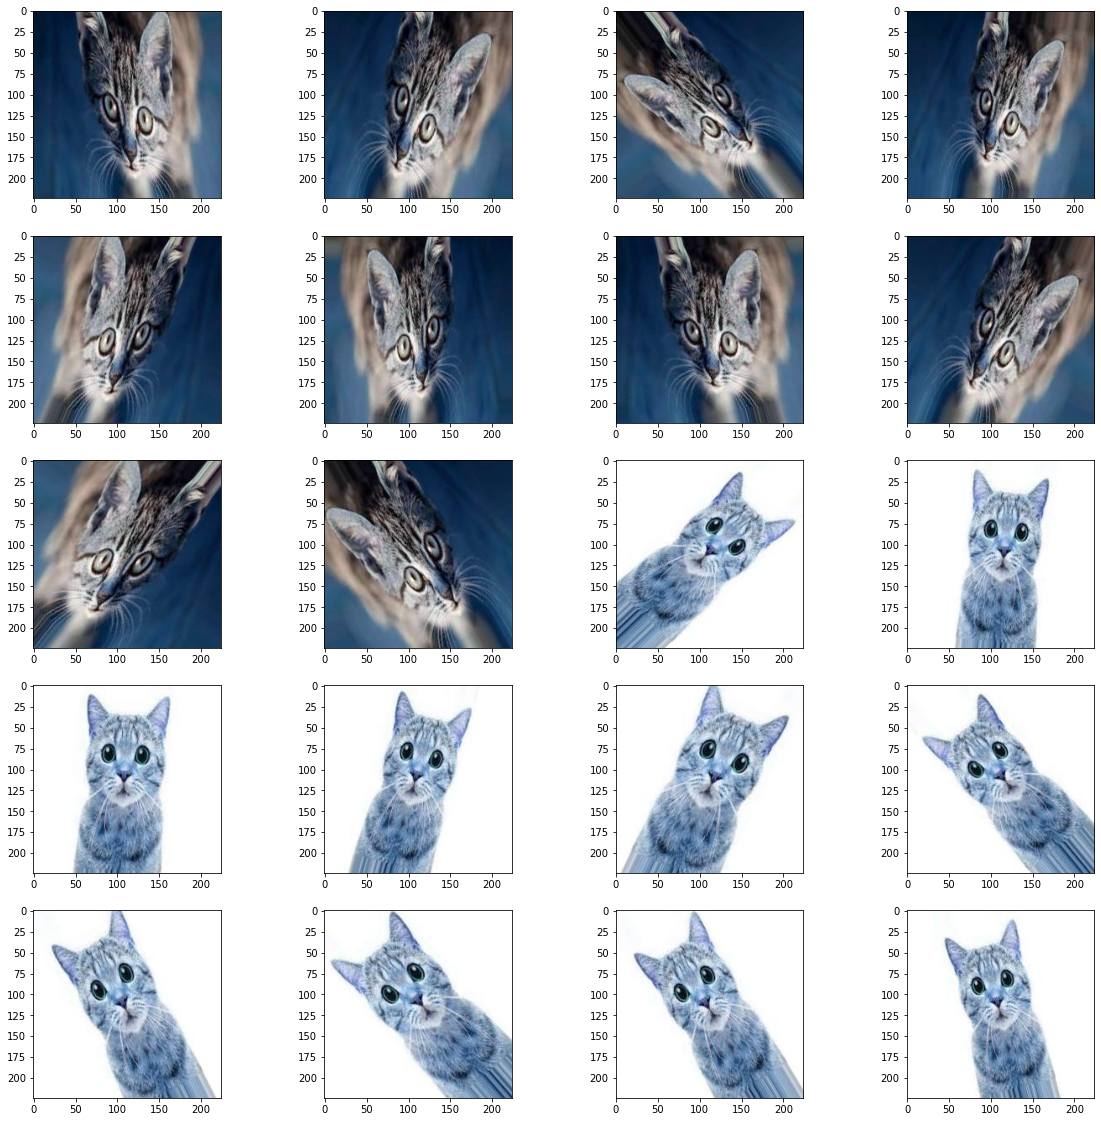

In [26]:
## Visualizing
fig = plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,4,1+i)
    plt.imshow(sample[i,:])
    plt.show